In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_venn import venn3_unweighted
from scipy import stats
import matplotlib.patches as mpatches
pd.options.mode.chained_assignment = None 

In [5]:
crc_m = pd.read_csv("./methylation/crc_me_qtl.csv")
stad_m = pd.read_csv("./methylation/stad_me_qtl.csv")
ucec_m = pd.read_csv("./methylation/ucec_me_qtl.csv")

qq_crc = pd.DataFrame({"ob_p" : crc_m.sort_values(by = "p_value")["p_value"], 
                       "exp_p" : np.arange(1, crc_m.shape[0] + 1) / (crc_m.shape[0] + 1) })
qq_stad = pd.DataFrame({"ob_p" : stad_m.sort_values(by = "p_value")["p_value"], 
                       "exp_p" : np.arange(1, stad_m.shape[0] + 1) / (stad_m.shape[0] + 1) })
qq_ucec = pd.DataFrame({"ob_p" : ucec_m.sort_values(by = "p_value")["p_value"], 
                       "exp_p" : np.arange(1, ucec_m.shape[0] + 1) / (ucec_m.shape[0] + 1) })
qq_all = pd.concat([qq_crc, qq_stad, qq_ucec], ignore_index=True)
qq_all["type"] = ["CRC"]*qq_crc.shape[0] + ["STAD"]*qq_stad.shape[0] + ["UCEC"]*qq_ucec.shape[0]

In [39]:
crc_m.shape, stad_m.shape, ucec_m.shape

((33312, 7), (10502, 7), (2564, 7))

In [6]:
crc_mf  = crc_m.query(" adj_p < 0.05")
stad_mf  = stad_m.query(" adj_p < 0.05")
ucec_mf  = ucec_m.query(" adj_p < 0.05")

In [45]:
crc_mf["gene"].nunique(), stad_mf["gene"].nunique(), ucec_mf["gene"].nunique()

(947, 281, 70)

In [ ]:
mf_crc_stad = pd.merge(crc_mf, stad_mf, on = ["str_id", "cg"])
stats.pearsonr(mf_crc_stad["coef_x"], mf_crc_stad["coef_y"])

Text(0, 0.5, 'Effect size in STAD')

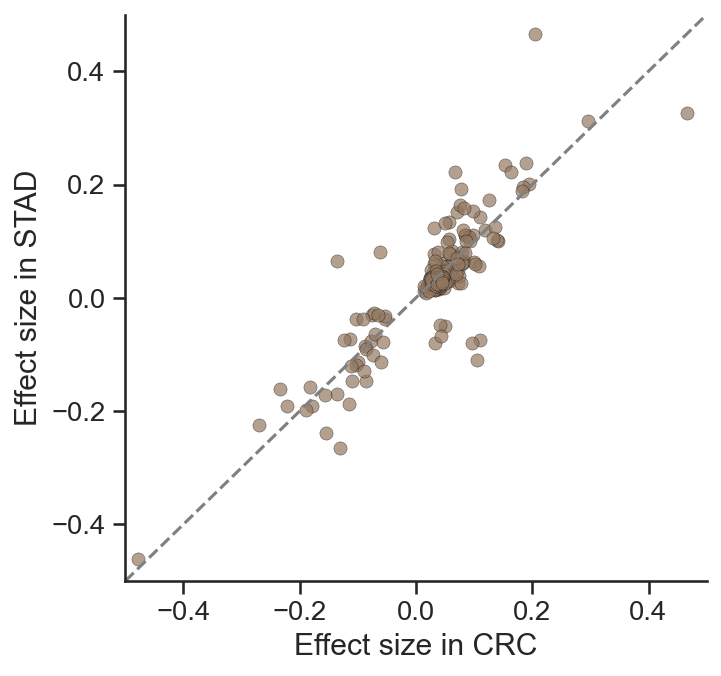

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(5,5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.2)
sns.scatterplot(ax = axes, data = mf_crc_stad , 
                x = "coef_x", y = "coef_y", 
                alpha = 0.7,
                edgecolor = "black",
                linewidth = 0.2,
                s = 40,
                color = sns.color_palette("deep")[5])
               # palette = [sns.color_palette("deep")[8], sns.color_palette("deep")[5]])
axes.plot([-0.5, 0.5], [-0.5,0.5], linestyle = "--", color = "gray")
axes.set_xlim(-0.5, 0.5)
axes.set_ylim(-0.5, 0.5)
axes.set_xlabel("Effect size in CRC")
axes.set_ylabel("Effect size in STAD")

In [37]:
mf_crc_ucec = pd.merge(crc_mf, ucec_mf, on = ["str_id", "cg"])
stats.pearsonr(mf_crc_ucec["coef_x"], mf_crc_ucec["coef_y"])

(0.9457451867489874, 1.334622099713503e-23)

Text(0, 0.5, 'Effect size in UCEC')

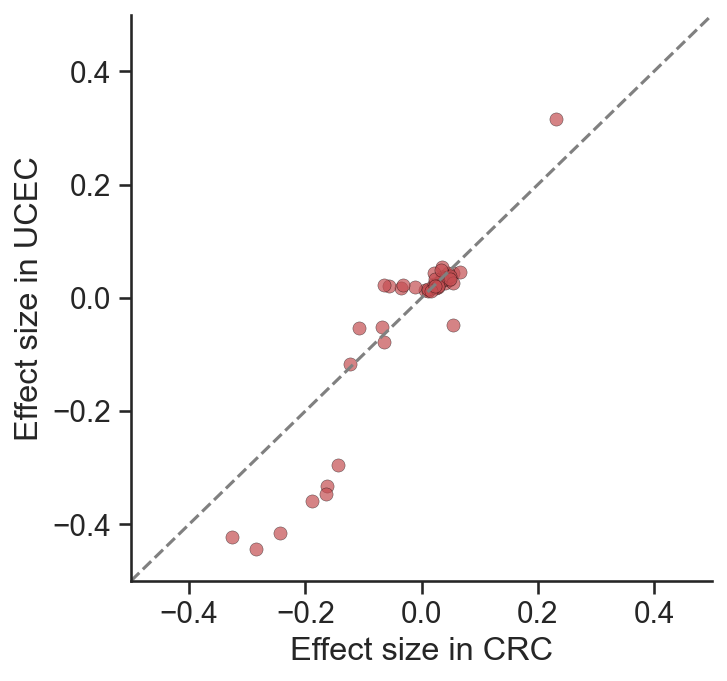

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(5,5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.3)
sns.scatterplot(ax = axes, data = mf_crc_ucec , 
                x = "coef_x", y = "coef_y", 
                alpha = 0.7,
                edgecolor = "black",
                linewidth = 0.2,
                s = 40,
                color = sns.color_palette("deep")[3])
               # palette = [sns.color_palette("deep")[8], sns.color_palette("deep")[5]])
axes.plot([-0.5, 0.5], [-0.5,0.5], linestyle = "--", color = "gray")
axes.set_xlim(-0.5, 0.5)
axes.set_ylim(-0.5, 0.5)
axes.set_xlabel("Effect size in CRC")
axes.set_ylabel("Effect size in UCEC")

In [40]:
mf_stad_ucec = pd.merge(stad_mf, ucec_mf, on = ["str_id", "cg"])
stats.pearsonr(mf_stad_ucec["coef_x"], mf_stad_ucec["coef_y"])

(0.5887314897693446, 0.02676058244629325)

In [42]:
mf_stad_ucec.shape

(14, 12)

Text(0, 0.5, 'Effect size in UCEC')

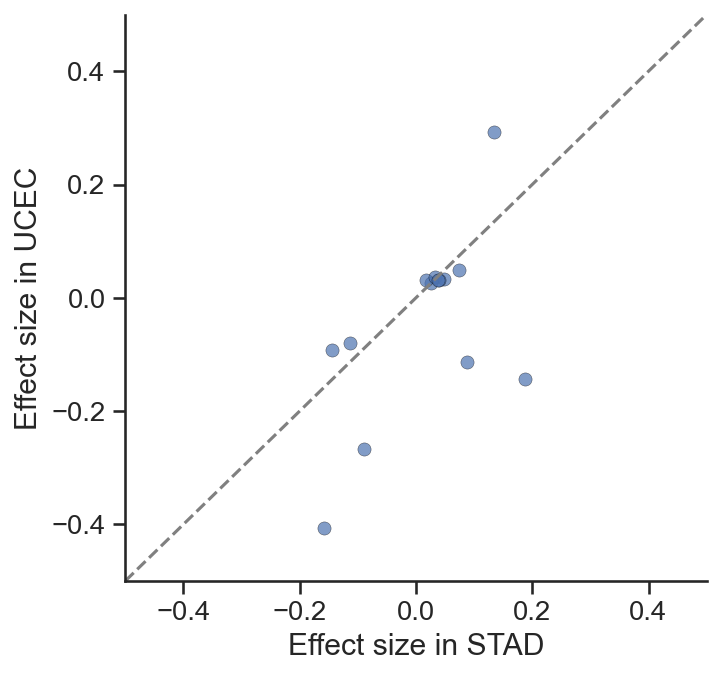

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(5,5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.3)
sns.scatterplot(ax = axes, data = mf_stad_ucec , 
                x = "coef_x", y = "coef_y", 
                alpha = 0.7,
                edgecolor = "black",
                linewidth = 0.2,
                s = 40,
                color = sns.color_palette("deep")[0])
               # palette = [sns.color_palette("deep")[8], sns.color_palette("deep")[5]])
axes.plot([-0.5, 0.5], [-0.5,0.5], linestyle = "--", color = "gray")
axes.set_xlim(-0.5, 0.5)
axes.set_ylim(-0.5, 0.5)
axes.set_xlabel("Effect size in STAD")
axes.set_ylabel("Effect size in UCEC")

### permutation stats

In [7]:
crc_stats = pd.read_csv("./methylation/crc_permu_stats.csv")
stad_stats = pd.read_csv("./methylation/stad_permu_stats.csv")
ucec_stats = pd.read_csv("./methylation/ucec_permu_stats.csv")

In [8]:
crc_mf.shape[0]/crc_m.shape[0]

0.18326729106628242

In [9]:
crc_stats["ratio_pairs"] = (crc_stats["sig_pairs"]/crc_stats["all_pairs"])
stad_stats["ratio_pairs"] = (stad_stats["sig_pairs"]/stad_stats["all_pairs"])
ucec_stats["ratio_pairs"] = (ucec_stats["sig_pairs"]/ucec_stats["all_pairs"])

Text(0, 0.5, 'UCEC')

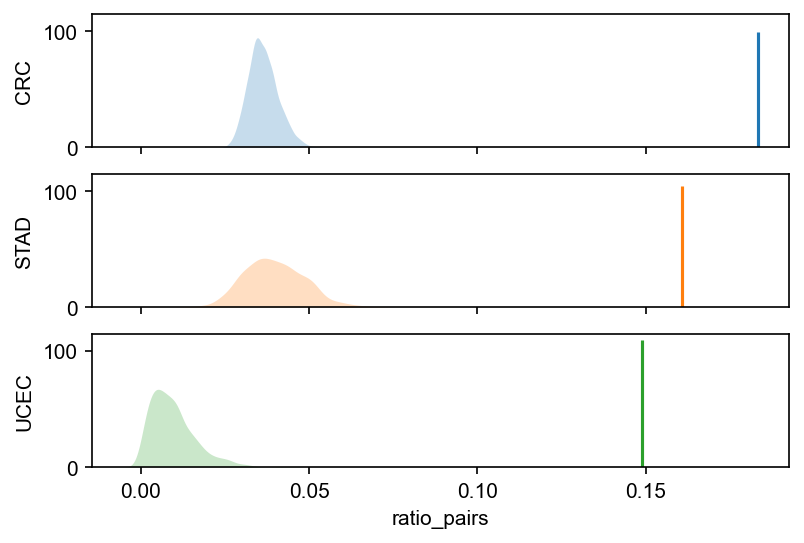

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4), dpi = 150, sharex=True, sharey=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
#sns.set_theme(style = "white", font_scale = 1.0)
sns.kdeplot(ax = axes[0], x = crc_stats["ratio_pairs"], 
                   fill = True, 
                   linewidth = 0,
                   common_norm= False,
                   color = sns.color_palette("tab10")[0])
axes[0].vlines(x = crc_mf.shape[0]/crc_m.shape[0], 
            ymin=0,
            ymax = axes[0].get_ylim()[1],
            color = sns.color_palette("tab10")[0])
axes[0].set_ylabel("CRC")

sns.kdeplot(ax = axes[1], x = stad_stats["ratio_pairs"], 
                   fill = True, 
                   linewidth = 0,
                   common_norm= False,
                   color = sns.color_palette("tab10")[1])
axes[1].vlines(x = stad_mf.shape[0]/stad_m.shape[0], 
            ymin=0,
            ymax = axes[1].get_ylim()[1],
            color = sns.color_palette("tab10")[1])
axes[1].set_ylabel("STAD")

sns.kdeplot(ax = axes[2], x = ucec_stats["ratio_pairs"], 
                   fill = True, 
                   linewidth = 0,
                   common_norm= False,
                   color = sns.color_palette("tab10")[2])
axes[2].vlines(x = ucec_mf.shape[0]/ucec_m.shape[0], 
            ymin=0,
            ymax = axes[2].get_ylim()[1],
            color = sns.color_palette("tab10")[2])
axes[2].set_ylabel("UCEC")

In [11]:
crc_mf["str_id"].nunique()/crc_m["str_id"].nunique(), crc_mf["gene"].nunique()/crc_m["gene"].nunique()

(0.8488200589970502, 0.8648401826484018)

In [12]:
stad_mf["str_id"].nunique()/stad_m["str_id"].nunique(), stad_mf["gene"].nunique()/stad_m["gene"].nunique()

(0.8131868131868132, 0.8097982708933718)

In [13]:
ucec_mf["str_id"].nunique()/ucec_m["str_id"].nunique(), ucec_mf["gene"].nunique()/ucec_m["gene"].nunique()

(0.7264150943396226, 0.7070707070707071)

Text(0.5, 0, 'Percentage')

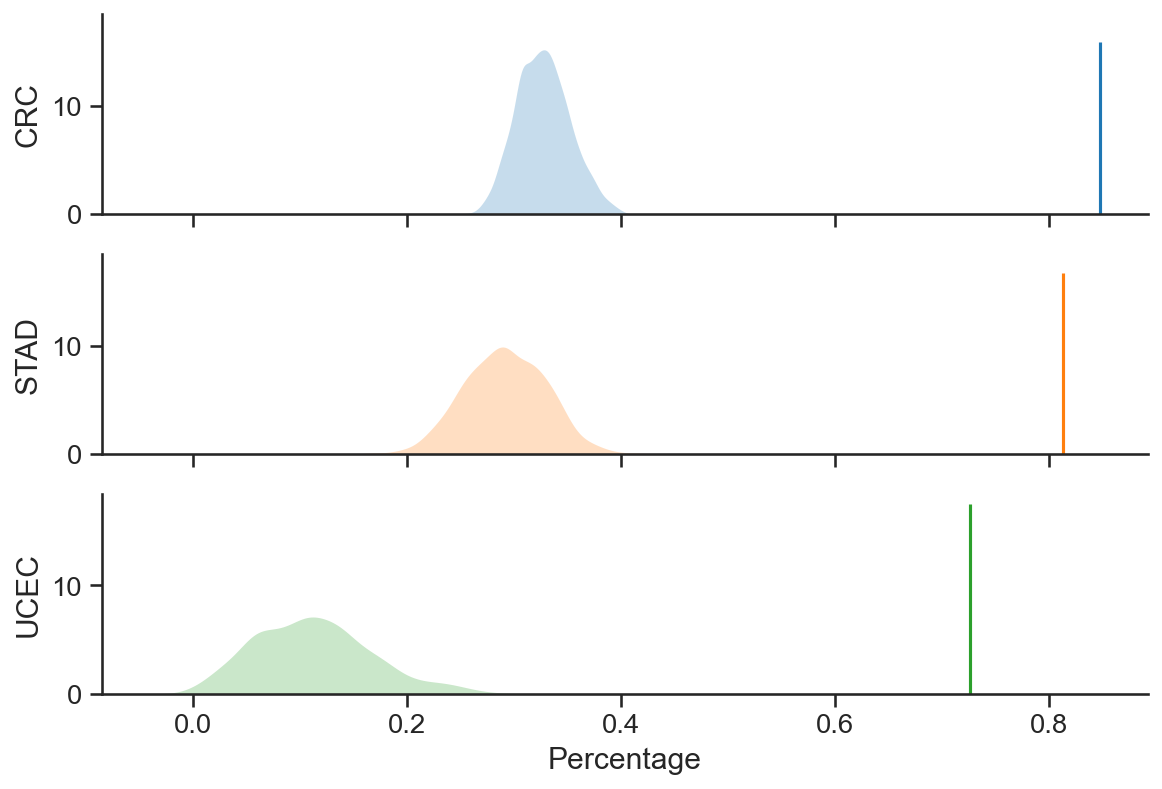

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(9, 6), dpi = 150, sharex=True, sharey=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale=1.2)
#sns.set_theme(style = "white", font_scale = 1.0)
sns.kdeplot(ax = axes[0], x = crc_stats["ratio"], 
                   fill = True, 
                   linewidth = 0,
                   common_norm= False,
                   color = sns.color_palette("tab10")[0])
axes[0].vlines(x = 0.848, 
            ymin=0,
            ymax = axes[0].get_ylim()[1],
            color = sns.color_palette("tab10")[0])
axes[0].set_ylabel("CRC")

sns.kdeplot(ax = axes[1], x = stad_stats["ratio"], 
                   fill = True, 
                    linewidth = 0,
                   common_norm= False,
                   color = sns.color_palette("tab10")[1])
axes[1].vlines(x = 0.813, 
            ymin=0,
            ymax = axes[1].get_ylim()[1],
            color = sns.color_palette("tab10")[1])
axes[1].set_ylabel("STAD")

sns.kdeplot(ax = axes[2], x = ucec_stats["ratio"], 
                   fill = True, 
                   linewidth = 0,
                   common_norm= False,
                   color = sns.color_palette("tab10")[2])
axes[2].vlines(x = 0.726, 
            ymin=0,
            ymax = axes[2].get_ylim()[1],
            color = sns.color_palette("tab10")[2])
axes[2].set_ylabel("UCEC")
axes[2].set_xlabel("Percentage")

### Direction testing

In [32]:
crc_estr = pd.read_csv("./output/ucec_estr.csv")

In [33]:
str_mf = pd.merge(ucec_mf, crc_estr, on = ["str_id", "gene"])

In [34]:
str_mf["dir"] = str_mf["coef_x"]*str_mf["coef_y"]

In [35]:
str_mf_opp = str_mf.query("dir < 0")

In [36]:
str_mf_opp["gene"].nunique()/ucec_mf["gene"].nunique()

0.6428571428571429